In [86]:
%%bash
pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd 
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from skimage.io import imread, imsave
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

(326, 440, 3)


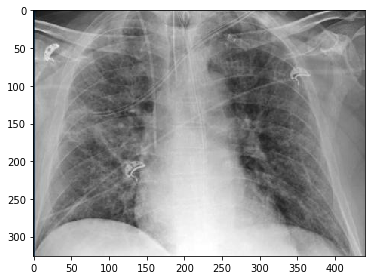

In [3]:
# inspecting one image for a test 

img = imread('data/COVID-Net/data/train/paving.jpg')
# imsave('data/COVID-Net/data/augData/test.jpg', img)
print(img.shape)
io.imshow(img)

### Data augmentation functions

In [4]:
# rotate the image by given degree
def rotateImage(image, angle):
    return rotate(image, angle=angle, mode='wrap')

# shift the image
def shiftImage(image):
    transform = AffineTransform(translation=(25,25))
    return warp(image, transform, mode='wrap')

# flip image horizontally
def flipHoriz(image):
    return np.fliplr(image)
    
# flip image vertically
def flipVert(image):
    return np.flipud(image)

# add noise to image
# sigma should be around 0.2
def addNoise(image, sigma):
    return random_noise(image, var=sigma**2)

# blur image
def blurImage(image):
    return gaussian(image, sigma=2.5, multichannel=True)    

### Load data and apply functions 

In [5]:
# read data csvs with labels (train and test, will do split later)
train_csv = pd.read_csv(r'data/COVID-Net/train_split_v3.txt', header=None, delimiter=' ')
train_csv.columns = ['img_number','img_name','disease', 'source']

test_csv = pd.read_csv(r'data/COVID-Net/test_split_v3.txt', header=None, delimiter=' ')
test_csv.columns = ['img_number','img_name','disease', 'source']

In [6]:
# get the covid data from train and test directories
#covidImages = train_csv[train_csv['disease'] == 'COVID-19']
#covidImages = covidImages.append(test_csv[test_csv['disease'] == 'COVID-19'])
covidImages.reset_index(inplace=True, drop=True)
covidImages

NameError: name 'covidImages' is not defined

In [135]:
data = [] # hold the augmented images
save_path = 'data/COVID-Net/data/augData/'

for image in tqdm(range(len(covidImages))):
    image_name = covidImages['img_name'][image]
    img_path = 'data/COVID-Net/data/train/' + image_name
    img = imread(img_path)
    label = covidImages['disease'][image]
    
    # append original image
    data.append([img, label]) 
    imsave(save_path + 'orig_' + image_name, img)
    
    # do all the augmentations and append them 
    rotImg = rotateImage(img, 45)
    data.append([rotImg, label])
    imsave(save_path + 'rotate_' + image_name , rotImg)

    shiftImg = shiftImage(img)
    data.append([shiftImg, label])
    imsave(save_path + 'shift_' + image_name , shiftImg)

    horizImg = flipHoriz(img)
    data.append([horizImg, label])
    imsave(save_path + 'horizFlip_' + image_name , horizImg)    
    
    vertImg = flipVert(img)
    data.append([vertImg, label])
    imsave(save_path + 'vertFlip_' + image_name , vertImg)
    
    noiseImg = addNoise(img, 0.2)
    data.append([noiseImg, label])
    imsave(save_path + 'noise_' + image_name , noiseImg)

    blurImg = blurImage(img)
    data.append([blurImg, label])
    imsave(save_path + 'blur_' + image_name , blurImg)

  0%|          | 0/470 [00:00<?, ?it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
  0%|          | 1/470 [00:00<05:23,  1.45it/s]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prio

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
  3%|▎         | 16/470 [00:34<20:45,  2.74s/it]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
  4%|▎         | 17/470 [00:37<21:49,  2.89s/it]Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to 

MemoryError: Unable to allocate 113. MiB for an array with shape (3480, 4248) and data type float64

In [132]:
data = np.array(data)
print(data.shape)
print(data)

(7, 2)
[[array([[[255, 255, 255],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [ 69,  70,  72],
        [ 68,  69,  71],
        [ 68,  69,  71]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [ 66,  67,  69],
        [ 66,  67,  69],
        [ 66,  67,  69]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [ 65,  66,  68],
        [ 64,  65,  67],
        [ 64,  65,  67]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [250, 250, 250],
        ...,
        [106, 107, 111],
        [108, 109, 113],
        [109, 110, 114]],

       [[255, 255, 255],
        [255, 255, 255],
        [250, 250, 250],
        ...,
        [ 96,  97, 101],
        [ 97,  98, 102],
        [ 97,  98, 102]],

       [[255, 255, 255],
        [255, 255, 255],
        [250, 250, 250],
        ...,
        [ 73,  74,  78],
        [ 74,  75,  79],
        [ 75,  